In [77]:
import math
import numpy
import matplotlib.pyplot as pyplot

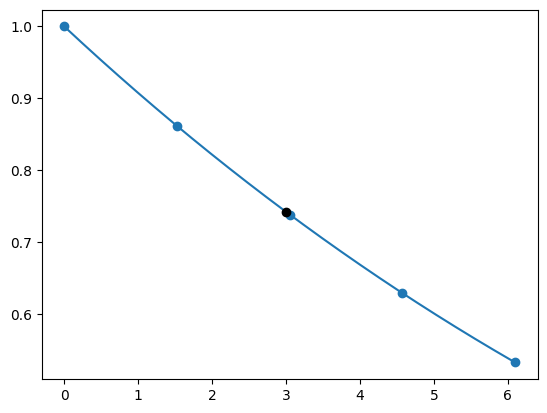

In [78]:
# 1.

def lagrange_polynomial(xs, ys):
    def function(x):
        y = 0
        for xi, yi in zip(xs, ys):
            yj = 1
            for xj in xs:
                if xj != xi:
                    yj *= (x - xj) / (xi - xj)
            y += yj * yi
        return y
    return function

xs = numpy.array([0, 1.525, 3.05, 4.575, 6.1])
ys = numpy.array([1, 0.8617, 0.7385, 0.6292, 0.5328])

x_axis = numpy.linspace(xs.min(), xs.max(), 1000)

pyplot.scatter(xs, ys)
pyplot.plot(x_axis, lagrange_polynomial(xs, ys)(x_axis))
pyplot.scatter(3, lagrange_polynomial(xs, ys)(3), color="black", zorder=2)
pyplot.show()

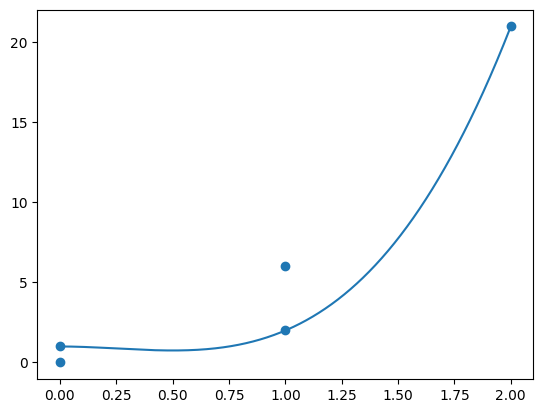

In [79]:
# 2.

def divided_difference(xs, ys, start, count):
    if (xs[start] == xs[start + count - 1]):
        first = start
        while first > 0:
            if xs[first - 1] == xs[start]:
                first -= 1
            else:
                break
        return ys[first + count - 1] / math.factorial(count - 1)
    else:
        return (divided_difference(xs, ys, start + 1, count - 1) - divided_difference(xs, ys, start, count - 1)) / (xs[start + count - 1] - xs[start])

def hermite_polynomial(xs, ys):
    def function(x):
        y = 0
        multiplier = 1
        for i, xi in enumerate(xs):
            y += divided_difference(xs, ys, 0, i + 1) * multiplier
            multiplier *= x - xi
        return y
    return function

xs = numpy.array([0, 0, 1, 1, 2])
ys = numpy.array([1, 0, 2, 6, 21])

x_axis = numpy.linspace(xs.min(), xs.max(), 1000)

pyplot.scatter(xs, ys)
pyplot.plot(x_axis, hermite_polynomial(xs, ys)(x_axis))
pyplot.show()

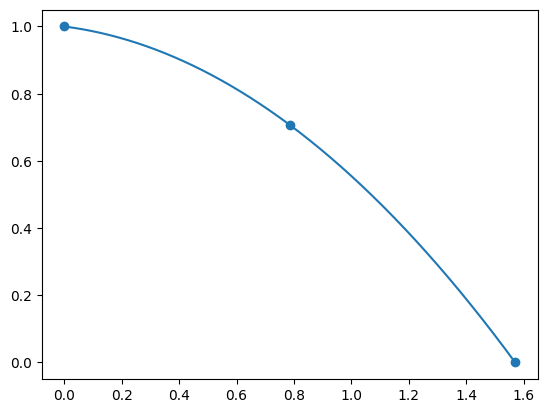

In [80]:
# 3.1.

def lagrange_polynomial(xs, ys):
    def function(x):
        y = 0
        for xi, yi in zip(xs, ys):
            yj = 1
            for xj in xs:
                if xj != xi:
                    yj *= (x - xj) / (xi - xj)
            y += yj * yi
        return y
    return function

xs = numpy.array([0, numpy.pi / 4, numpy.pi / 2])
ys = numpy.cos(xs)

x_axis = numpy.linspace(xs.min(), xs.max(), 1000)

pyplot.scatter(xs, ys)
pyplot.plot(x_axis, lagrange_polynomial(xs, ys)(x_axis))
pyplot.show()

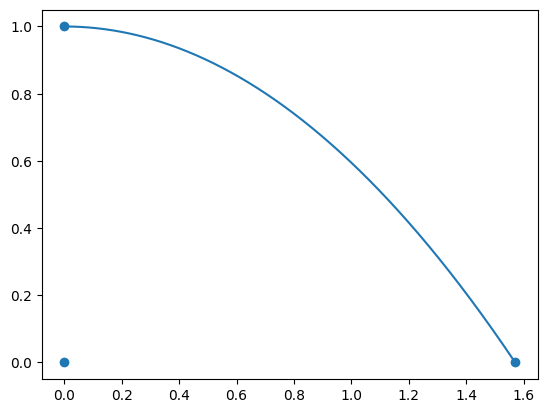

In [81]:
# 3.2.

def divided_difference(xs, ys, start, count):
    if (xs[start] == xs[start + count - 1]):
        first = start
        while first > 0:
            if xs[first - 1] == xs[start]:
                first -= 1
            else:
                break
        return ys[first + count - 1] / math.factorial(count - 1)
    else:
        return (divided_difference(xs, ys, start + 1, count - 1) - divided_difference(xs, ys, start, count - 1)) / (xs[start + count - 1] - xs[start])

def hermite_polynomial(xs, ys):
    def function(x):
        y = 0
        multiplier = 1
        for i, xi in enumerate(xs):
            y += divided_difference(xs, ys, 0, i + 1) * multiplier
            multiplier *= x - xi
        return y
    return function

xs = numpy.array([0, 0, numpy.pi / 2])
# cos(0), -sin(0), cos(pi / 2)
ys = numpy.array([1, 0, 0])

x_axis = numpy.linspace(xs.min(), xs.max(), 1000)

pyplot.scatter(xs, ys)
pyplot.plot(x_axis, hermite_polynomial(xs, ys)(x_axis))
pyplot.show()

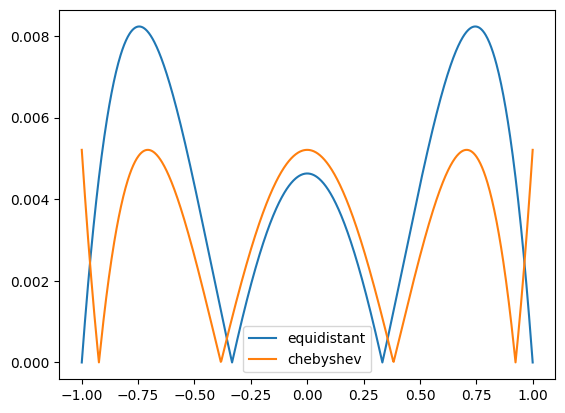

In [82]:
# 4.

equidistant = numpy.linspace(-1, 1, 4)
chebyshev = numpy.array([numpy.cos((2 * i + 1) / (2 * 4) * numpy.pi) for i in range(4)])

x_axis = numpy.linspace(-1, 1, 1000)

def error_estimate(xs):
    def function(x):
        error = 1 / math.factorial(len(xs))
        for xi in xs:
            error *= x - xi
        return numpy.abs(error)
    return function

pyplot.plot(x_axis, error_estimate(equidistant)(x_axis))
pyplot.plot(x_axis, error_estimate(chebyshev)(x_axis))
pyplot.legend(['equidistant', 'chebyshev'])
pyplot.show()

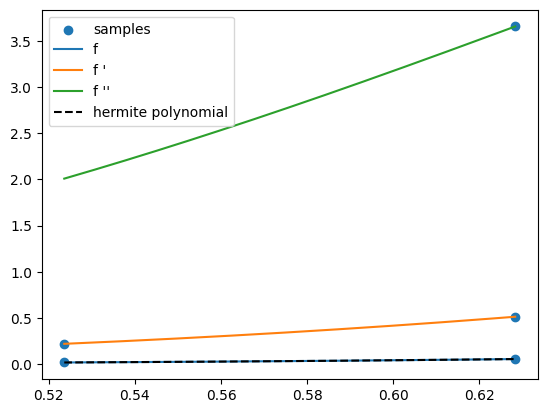

In [83]:
# 5.

def divided_difference(xs, ys, start, count):
    if (xs[start] == xs[start + count - 1]):
        first = start
        while first > 0:
            if xs[first - 1] == xs[start]:
                first -= 1
            else:
                break
        return ys[first + count - 1] / math.factorial(count - 1)
    else:
        return (divided_difference(xs, ys, start + 1, count - 1) - divided_difference(xs, ys, start, count - 1)) / (xs[start + count - 1] - xs[start])

def hermite_polynomial(xs, ys):
    def function(x):
        y = 0
        multiplier = 1
        for i, xi in enumerate(xs):
            y += divided_difference(xs, ys, 0, i + 1) * multiplier
            multiplier *= x - xi
        return y
    return function

def f(x):
    return numpy.sin(x ** 2) ** 3

def f_first_derivative(x):
    return 6 * x * numpy.cos(x ** 2) * (numpy.sin(x ** 2) ** 2)

def f_second_derivative(x):
    return -12 * (x ** 2) * (numpy.sin(x ** 2) ** 3) + 6 * numpy.cos(x ** 2) * (numpy.sin(x ** 2) ** 2) + 24 * (x ** 2) * (numpy.cos(x ** 2) ** 2   ) * numpy.sin(x ** 2)

xs = numpy.array([numpy.pi / 6, numpy.pi / 6, numpy.pi / 5, numpy.pi / 5, numpy.pi / 5])
ys = numpy.array([f(numpy.pi / 6), f_first_derivative(numpy.pi / 6), f(numpy.pi / 5), f_first_derivative(numpy.pi / 5), f_second_derivative(numpy.pi / 5)])

xaxis = numpy.linspace(xs.min(), xs.max(), 1000)

pyplot.scatter(xs, ys)
pyplot.plot(xaxis, f(xaxis))
pyplot.plot(xaxis, f_first_derivative(xaxis))
pyplot.plot(xaxis, f_second_derivative(xaxis))
pyplot.plot(xaxis, hermite_polynomial(xs, ys)(xaxis), color="black", linestyle="--")
pyplot.legend(["samples", "f", "f '", "f ''", "hermite polynomial"])
pyplot.show()

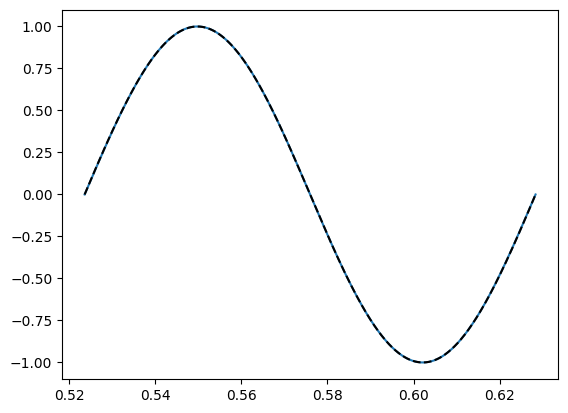

In [84]:
# 6.

def lagrange_polynomial(xs, ys):
    def function(x):
        y = 0
        for xi, yi in zip(xs, ys):
            yj = 1
            for xj in xs:
                if xj != xi:
                    yj *= (x - xj) / (xi - xj)
            y += yj * yi
        return y
    return function

def req(degree, x0, step, function):
    xs = numpy.linspace(x0, x0 + degree * step, degree)
    ys = function(xs)
    return lagrange_polynomial(xs, ys)

x_axis = numpy.linspace(0, 2 * numpy.pi, 1000)

pyplot.plot(xaxis, numpy.sin(x_axis))
pyplot.plot(xaxis, req(8, 0, numpy.pi / 4, numpy.sin)(x_axis), color="black", linestyle="--")
pyplot.show()

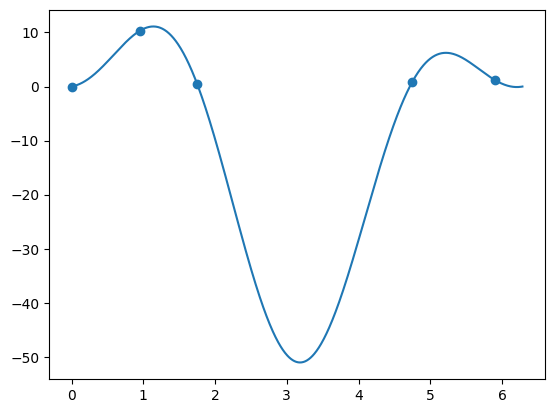

In [85]:
# 7.

def generalized_polynomial(solution, basis):
    def function(x):
        y = 0
        for coeff, function in zip(solution, basis):
            y += coeff * function(x)
        return y
    return function

xs = numpy.array([0, 0.95, 1.75, 4.75, 5.9])
ys = numpy.array([0, 10.3, 0.5, 0.9, 1.2])
period = 2 * numpy.pi

x_axis = numpy.linspace(0, period, 1000)

def b0(x):
    return 1

def b1(x):
    return numpy.cos(2 * numpy.pi / period * x)

def b2(x):
    return numpy.sin(2 * numpy.pi / period * x)

def b3(x):
    return numpy.cos(2 * numpy.pi / period * 2 * x)

def b4(x):
    return numpy.sin(2 * numpy.pi / period * 2 * x)

basis = numpy.array([b0, b1, b2, b3, b4])
#basis = numpy.array([lambda x, i=i: x ** i for i in range(len(xs))])
#basis = numpy.array([lambda x, i=i: numpy.e ** (i * x) for i in range(len(xs))])
#basis = numpy.array([lambda x, i=i: numpy.e ** (-1 * i * x) for i in range(len(xs))])
matrix = numpy.array([numpy.array([function(x) for function in basis]) for x in xs])
solution = numpy.linalg.solve(matrix, ys)

pyplot.scatter(xs, ys)
pyplot.plot(x_axis, generalized_polynomial(solution, basis)(x_axis))
pyplot.show()

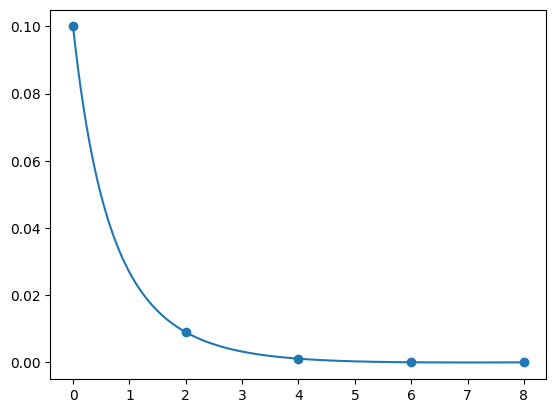

In [86]:
# 8.

def generalized_polynomial(solution, basis):
    def function(x):
        y = 0
        for coeff, function in zip(solution, basis):
            y += coeff * function(x)
        return y
    return function

xs = numpy.array([0, 2, 4, 6, 8])
ys = numpy.array([0.1, 0.009, 0.0011, 0.00003, 0.0000012])

x_axis = numpy.linspace(xs.min(), xs.max(), 1000)

#basis = numpy.array([lambda x, i=i: x ** i for i in range(len(xs))])
#basis = numpy.array([lambda x, i=i: numpy.e ** (i * x) for i in range(len(xs))])
basis = numpy.array([lambda x, i=i: 1 / (i + 1 + x) for i in range(len(xs))])
#basis = numpy.array([lambda x, i=i: numpy.e ** (-1 * i * x) for i in range(len(xs))])
#basis = numpy.array([lambda x, i=i: 1 / (i + 1 - x) for i in range(len(xs))])
matrix = numpy.array([numpy.array([function(xi) for function in basis]) for xi in xs])
solution = numpy.linalg.solve(matrix, ys)

pyplot.scatter(xs, ys)
pyplot.plot(x_axis, generalized_polynomial(solution, basis)(x_axis))
pyplot.show()